## Expand log file from VM

In [7]:
def save_list_to_file(path, thelist):
    '''
    Tool function to save a list to a .txt file
    '''
    with open(path, 'w') as f:
        for item in thelist:
            f.write("%s" % item)

In [25]:
with open('epoch_total_test_log_reproduction.txt','r') as f:
    l = f.readlines()

In [26]:
filename = 'epoch_{}_test_log_reproduction.txt'
for i in range(1, 150):
    try:
        idx = l.index('\n')
        save_list_to_file(filename.format(str(i)),l[:idx])
        l = l[idx+1:]
    except:
        print(i)
        save_list_to_file(filename.format(str(i)),l)

## Training curves

In [2]:
import matplotlib.pyplot as plt

In [5]:
train_all = []
train = []
test = []

src_path = 'logs/linemod/'
filename_train = 'epoch_{}_log.txt'
filename_test = 'epoch_{}_test_log.txt'
nb_subepochs = 40000 / 800
for epoch in range(1,171):
    
    with open(src_path + filename_train.format(str(epoch)),'r') as f:
        current = 0
        for l in f.readlines()[1:]:
            train_all.append(float(l.split(' ')[-1][9:-2]))
            current += train_all[-1]
        current /= nb_subepochs
        train.append(current)
        
    with open(src_path + filename_test.format(str(epoch)),'r') as f:
        for l in f.readlines()[1:]:
            test.append(float(l.split(' ')[-1][:-2]))

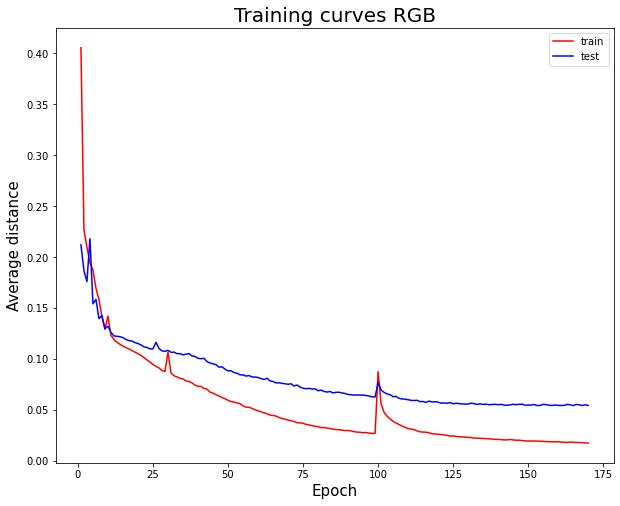

In [6]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,171)),train,label='train',color='r')
plt.plot(list(range(1,171)),test,label='test',color='b')
plt.title('Training curves RGB',size=20)
plt.xlabel('Epoch', size=15)
plt.ylabel('Average distance', size=15)
plt.legend()
plt.show()

## Training curves reproduction

In [5]:
for i in range(150,181):
    os.rename(
        'logs/linemod/epoch_{}_test_log.txt'.format(str(i)),
        'logs/linemod/epoch_{}_test_log_reproduction.txt'.format(str(i))
             )

In [11]:
train_all = []
train = []
test = []

src_path = 'logs/linemod/'
filename_train = 'epoch_{}_log_reproduction.txt'
filename_test = 'epoch_{}_test_log_reproduction.txt'
nb_subepochs = 40000 / 800
for epoch in range(1,150):
    
    with open(src_path + filename_train.format(str(epoch)),'r') as f:
        current = 0
        for l in f.readlines()[1:]:
            train_all.append(float(l.split(' ')[-1][9:-2]))
            current += train_all[-1]
        current /= nb_subepochs
        train.append(current)
        
    with open(src_path + filename_test.format(str(epoch)),'r') as f:
        for l in f.readlines()[1:]:
            test.append(float(l.split(' ')[-1][:-2]))

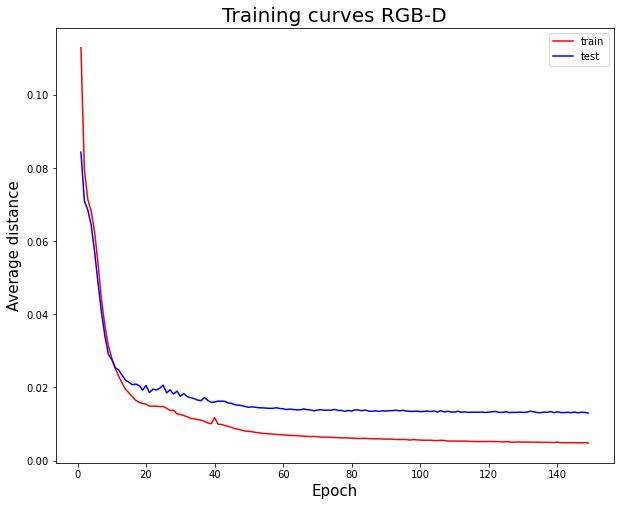

In [12]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,150)),train,label='train',color='r')
plt.plot(list(range(1,150)),test,label='test',color='b')
plt.title('Training curves RGB-D',size=20)
plt.xlabel('Epoch', size=15)
plt.ylabel('Average distance', size=15)
plt.legend()
plt.show()

## Plot evaluation results

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diameters = [
    0.10209865663,
    0.24750624233,
    0.17249224865,
    0.20140358597000002,
    0.15454551808,
    0.26147178102,
    0.10899920102000001,
    0.14554287471000002,
    0.27807811733,
    0.28260129399,
    0.212335825148,
]

objlist = ['01', '02', '04', '05', '06', '08', '09', '12', '13', '14', '15']
obj_diameters = []
for idx,obj in enumerate(objlist):
    with open('../datasets/linemod/Linemod_preprocessed/data/{}/test.txt'.format(obj),'r') as f:
        if not idx:
            obj_diameters += (len(f.readlines())-1)*[diameters[idx]]
        else:
            obj_diameters += len(f.readlines())*[diameters[idx]]
obj_diameters = np.array(obj_diameters)

In [3]:
dists_rgb = []
with open('eval_result/linemod/eval_result_logs_RGB_final.txt','r') as f:
    for line in f.readlines():
        dists_rgb.append(float(line.split(' ')[-1][:-2]))
f.close()
dists_rgb = np.array(dists_rgb)

dists_tdepth = []
with open('eval_result/linemod/eval_result_logs_TransDepth.txt','r') as f:
    for line in f.readlines():
        dists_tdepth.append(float(line.split(' ')[-1][:-2]))
f.close()
dists_tdepth = np.array(dists_tdepth)

dists_rmv_icp = []
with open('eval_result/linemod/eval_result_logs_rmv_icp.txt','r') as f:
    for line in f.readlines():
        dists_rmv_icp.append(float(line.split(' ')[-1][:-2]))
f.close()
dists_rmv_icp = np.array(dists_rmv_icp)

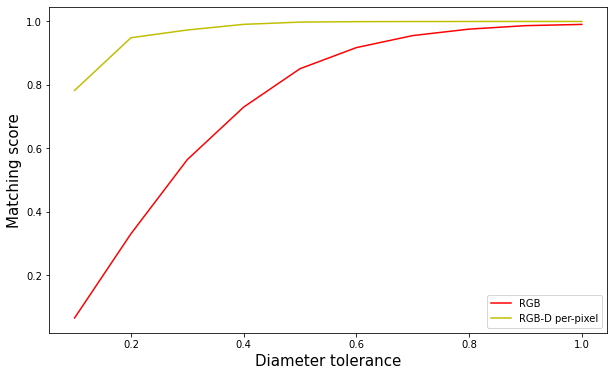

In [7]:
tolerance = np.linspace(0.1,1,10)
rgb_avg_acc = []
tdepth_avg_acc = []
rmv_icp_avg_acc = []
for t in tolerance:
    rgb_avg_acc.append(1 - np.count_nonzero(np.clip(dists_rgb - t*obj_diameters,0,None)) / len(dists_rgb))
    tdepth_avg_acc.append(1 - np.count_nonzero(np.clip(dists_tdepth - t*obj_diameters,0,None)) / len(dists_tdepth))
    rmv_icp_avg_acc.append(1 - np.count_nonzero(np.clip(dists_rmv_icp - t*obj_diameters,0,None)) / len(dists_rmv_icp))

plt.figure(figsize=(10,6))
plt.plot(tolerance, rgb_avg_acc, label='RGB', color='r')
#plt.plot(tolerance, tdepth_avg_acc, label='trans_depth', color='b')
plt.plot(tolerance, rmv_icp_avg_acc, label='RGB-D per-pixel', color='y')
#plt.title('Evaluation average accuracy',size=20)
plt.xlabel('Diameter tolerance', size=15)
plt.ylabel('Matching score', size=15)
plt.legend()
plt.show()

**On the whole, same performance between DenseFusion on RGB-only and DenseFusion on RGBD without ICP**

In [5]:
def crop_center(img,cropx,cropy):
    y,x,z = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx,:]

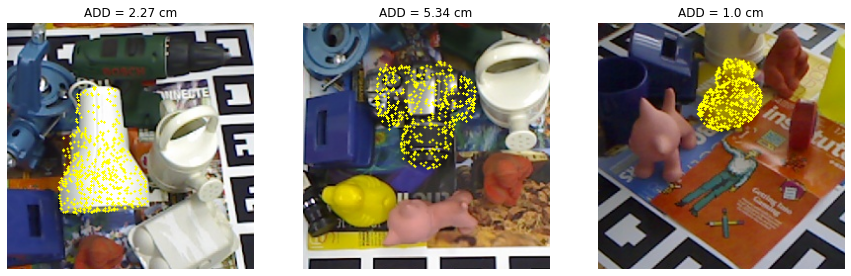

In [15]:
adds = [2.27,5.34,1.0]
#adds = [3.2,9.2,5.1]
imgs = ['0029','0056','0287']
#imgs = ['0578','0626','0951']
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,10))
i = 0
for add, img in zip(adds,imgs):
    ax[i].imshow(crop_center(plt.imread('../../rendus/images/{}.png'.format(img)), 250,250))
    ax[i].axis('off')
    ax[i].set_title('ADD = '+str(add)+' cm')
    i += 1